In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow tensorflow.gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define paths to the training and validation datasets
train_dir = '/content/drive/MyDrive/Colab Notebooks/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/validation'

# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# Load VGG19 pretrained on ImageNet
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pretrained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=len(validation_generator))
print("Test accuracy:", test_acc)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
80134624/80134624 [==============================] - 0s 0us/step


Epoch 1/10
33/33 [==============================] - 520s 16s/step - loss: 0.6311 - accuracy: 0.7205 - val_loss: 0.2488 - val_accuracy: 0.9023
Epoch 2/10
33/33 [==============================] - 524s 16s/step - loss: 0.2034 - accuracy: 0.9289 - val_loss: 0.1418 - val_accuracy: 0.9336
Epoch 3/10
33/33 [==============================] - 444s 14s/step - loss: 0.1811 - accuracy: 0.9270 - val_loss: 0.1064 - val_accuracy: 0.9531
Epoch 4/10
33/33 [==============================] - 499s 15s/step - loss: 0.1431 - accuracy: 0.9426 - val_loss: 0.0522 - val_accuracy: 0.9727
Epoch 5/10
33/33 [==============================] - 496s 15s/step - loss: 0.1366 - accuracy: 0.9523 - val_loss: 0.0734 - val_accuracy: 0.9609
Epoch 6/10
33/33 [==============================] - 498s 15s/step - loss: 0.1093 - accuracy: 0.9552 - val_loss: 0.0781 - val_accuracy: 0.9570
Epoch 7/10
33/33 [==============================] - 499s 15s/step - loss: 0.1038 - accuracy: 0.9611 - val_loss: 0.1764 - val_accuracy: 0.9219
Epoch 

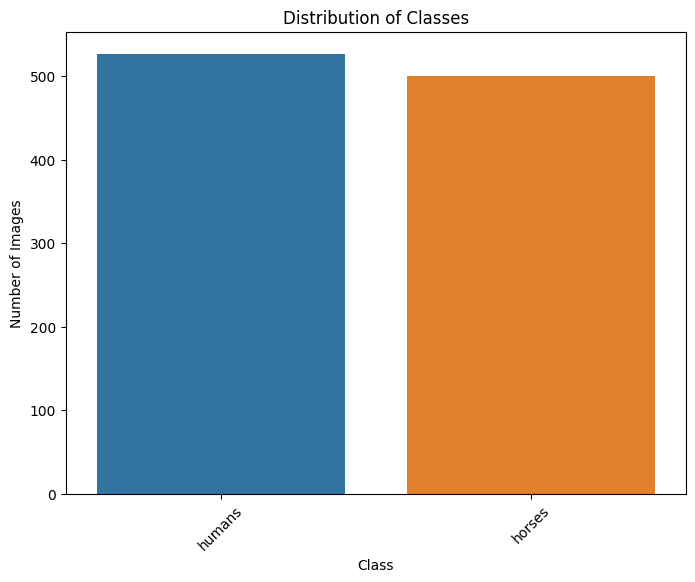

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the path to the dataset directory
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/train'

# List the classes (assuming 'horses' and 'humans')
classes = os.listdir(dataset_dir)

# Count the number of images in each class
num_images_per_class = {}
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    num_images = len(os.listdir(class_dir))
    num_images_per_class[class_name] = num_images

# Create a DataFrame for EDA
eda_df = pd.DataFrame(num_images_per_class.values(), index=num_images_per_class.keys(), columns=['Number of Images'])

# Plot a bar chart to visualize the distribution of classes
plt.figure(figsize=(8, 6))
sns.barplot(x=eda_df.index, y=eda_df['Number of Images'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes')
plt.xticks(rotation=45)
plt.show()